In [1]:
import geokit as gk

## Divide multipolygons along the antimeridian

In [2]:
# load the shape file of Fidji, a country spanning the antimeridian
import pathlib
from geokit.core.get_test_data import get_test_data

data_cache_folder = pathlib.Path().cwd().parent.joinpath("data")


FJI_df = gk.vector.extractFeatures(
    get_test_data(
        file_name="FJI.shp",
        data_cache_folder=data_cache_folder,
    )
)


FJI_geom = FJI_df.geom.iloc[0]

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x000002619BC4D000>, <matplotlib.patches.PathPatch object at 0x000002619BC4D570>, <matplotlib.patches.PathPatch object at 0x000002619BC4D780>, <matplotlib.patches.PathPatch object at 0x000002619BC4D990>, <matplotlib.patches.PathPatch object at 0x000002619BC4DBD0>, <matplotlib.patches.PathPatch object at 0x000002619BC4DDB0>, <matplotlib.patches.PathPatch object at 0x000002619BC4DFC0>, <matplotlib.patches.PathPatch object at 0x000002619BC4E1D0>, <matplotlib.patches.PathPatch object at 0x000002619BC4E3E0>]], cbar=None)

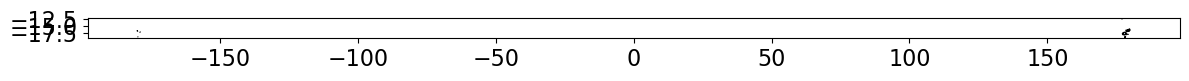

In [3]:
# FJI is split into two parts, one in the eastern hemisphere and one in the western hemisphere separated by the antimeridian
# in our example like mostly, the Western part has been shifted eastwards by 360 degrees
# that creates a problem when plotting the data or loading anything via the extent due to its huge extent of 360° longitude

# the test plot demonstrates the problem
gk.drawGeoms(FJI_geom)

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x00000261A195CEB0>, <matplotlib.patches.PathPatch object at 0x00000261A195E050>, <matplotlib.patches.PathPatch object at 0x00000261A195E260>, <matplotlib.patches.PathPatch object at 0x00000261A195E4D0>, <matplotlib.patches.PathPatch object at 0x00000261A195E6E0>, <matplotlib.patches.PathPatch object at 0x00000261A195E890>, <matplotlib.patches.PathPatch object at 0x00000261A195EAA0>, <matplotlib.patches.PathPatch object at 0x00000261A195ECB0>, <matplotlib.patches.PathPatch object at 0x00000261A195EF50>, <matplotlib.patches.PathPatch object at 0x00000261A195F100>, <matplotlib.patches.PathPatch object at 0x00000261A195F310>, <matplotlib.patches.PathPatch object at 0x00000261A195F550>, <matplotlib.patches.PathPatch object at 0x00000261A195F700>, <matplotlib.patches.PathPatch object at 0x00000261A195F910>, <matplotlib.patches.PathPatch object at 0x00000261A195FB20>, <matplotlib.patches.PathPatch object at 0x00000261A195

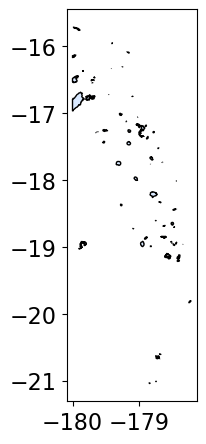

In [4]:
# we can therefore extract each of the two parts separately
# demonstrate here for the part "right" of the antimeridian (i.e. East of antimeridian but West on the map)
FJI_right_geom = gk.geom.divideMultipolygonIntoEasternAndWesternPart(geom=FJI_geom, side="right")
gk.drawGeoms(FJI_right_geom, figsize=(4,4))

# (side='left' would return the part West of the antimeridian, i.e. East on the map)
# (side='both' would return both parts as a tuple of 2 geometries)

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x00000261A142EB30>, <matplotlib.patches.PathPatch object at 0x00000261A142F2E0>, <matplotlib.patches.PathPatch object at 0x00000261A142F550>, <matplotlib.patches.PathPatch object at 0x00000261A142F4C0>, <matplotlib.patches.PathPatch object at 0x00000261A142F8E0>, <matplotlib.patches.PathPatch object at 0x00000261A142FAF0>, <matplotlib.patches.PathPatch object at 0x00000261A142FD00>, <matplotlib.patches.PathPatch object at 0x00000261A142FFA0>, <matplotlib.patches.PathPatch object at 0x00000261A1488190>, <matplotlib.patches.PathPatch object at 0x00000261A14883D0>, <matplotlib.patches.PathPatch object at 0x00000261A1488550>, <matplotlib.patches.PathPatch object at 0x00000261A1488790>, <matplotlib.patches.PathPatch object at 0x00000261A14889A0>, <matplotlib.patches.PathPatch object at 0x00000261A1488BE0>, <matplotlib.patches.PathPatch object at 0x00000261A1488DF0>, <matplotlib.patches.PathPatch object at 0x00000261A148

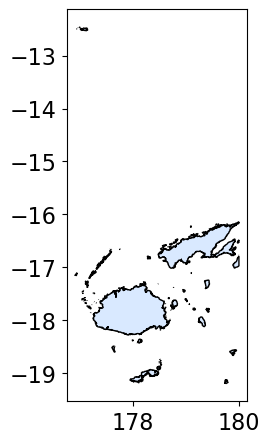

In [5]:
# side='main' returns the side with the largest total polygon area
FJI_main_geom = gk.geom.divideMultipolygonIntoEasternAndWesternPart(geom=FJI_geom, side="main")
gk.drawGeoms(FJI_main_geom, figsize=(4,4))

# we can see that in our case, it is the part "left" of the antimeridian that has the largest area

## Split and shift geometries along the antimeridian

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x00000261A166BA00>, <matplotlib.patches.PathPatch object at 0x00000261A166BC10>]], cbar=None)

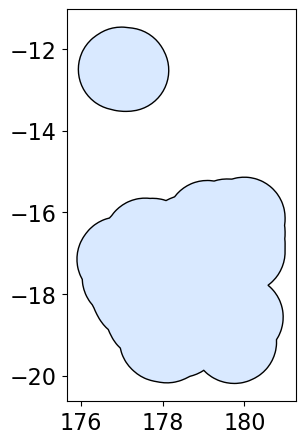

In [6]:
# assume we need to buffer the western (left) part of the country by 1°
FJI_main_geom_buffered = FJI_main_geom.Buffer(1)

# the buffered geometry now exceeds over the antimeridian
gk.drawGeoms(FJI_main_geom_buffered, figsize=(4,4))

In [7]:
# envelope proves that we exceed 180° line
FJI_main_geom_buffered.GetEnvelope()

(175.89971924, 181.0, -20.19361115, -11.46172428)

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x00000261A16D2410>, <matplotlib.patches.PathPatch object at 0x00000261A16D2620>]], cbar=None)

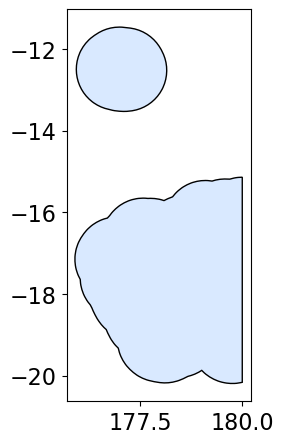

In [8]:
# this causes potential trouble down the line, so we can split the buffered geometry again at the antimeridian

# first approch: simply clip off the areas that extend over the antimeridian
# (keeps the part where the center of the geometry is located, here the western part)
FJI_main_geom_buffered_clipped = gk.geom.fixOutOfBoundsGeoms(
    geom=FJI_main_geom_buffered, 
    how="clip"
)
gk.drawGeoms(FJI_main_geom_buffered_clipped, figsize=(4,4))

AxHands(ax=<Axes: >, handles=[[<matplotlib.patches.PathPatch object at 0x00000261A1748A30>, <matplotlib.patches.PathPatch object at 0x00000261A1748C40>, <matplotlib.patches.PathPatch object at 0x00000261A1748E50>]], cbar=None)

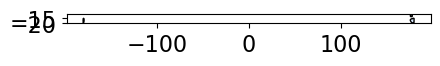

In [9]:
# the other option is to shift the geometry to the other side of the antimeridian
# this is a common option when dealing with geometries in EPSG:4326, also e.g. in GADM data
FJI_main_geom_buffered_splitshifted = gk.geom.fixOutOfBoundsGeoms(
    geom=FJI_main_geom_buffered, 
    how="shift"
)
gk.drawGeoms(FJI_main_geom_buffered_splitshifted, figsize=(4,4))